# WeatherPy
----

### Analysis
* Data analysis showed that the temperature becomes warmer approaching equator and colder moving away from it. 
* Current weather data in the "City Latitude vs Max Temperature" chart also illustrates that cities in the southern hemisphere (-60 Deg, Latitude) tend to have a little warmer weather than cities in the northern hemisphere (60 Deg, Latitude).
* The Cloundness/Humidity/Wind Speed data didn't show any relationships compared to the Latitude data as illustrated in the respective charts.
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

734

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Specify units
units = "imperial"

#Create query url 
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
# Create empty lists to hold the data we need to retrieve from the API call
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lon = []
country = []
cities_list = []

# Set the count and set values
count = 0
set = 1

In [5]:
# Create for loop that will retrieve data of interest from API
for city in cities:
    # Specify try/except for cases when city name doesn't exist
    try:
        print(f"Processing record {count} | {city} ")
        # Make an API call
        response = requests.get(query_url + city).json()
        
        # Add data to the every list based on its value
        cities_list.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        country.append(response["sys"]["country"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        count += 1 
          
    except KeyError:
        print("City not found. Skipping...")
        
print("------------") 
print("Data Retrieval Complete")      


Processing record 0 | touros 
Processing record 1 | luganville 
Processing record 2 | albany 
Processing record 3 | nchelenge 
Processing record 4 | puerto ayora 
Processing record 5 | new norfolk 
Processing record 6 | taolanaro 
City not found. Skipping...
Processing record 6 | barrow 
Processing record 7 | rikitea 
Processing record 8 | butaritari 
Processing record 9 | bethel 
Processing record 10 | mar del plata 
Processing record 11 | east london 
Processing record 12 | brae 
Processing record 13 | qaanaaq 
Processing record 14 | ahipara 
Processing record 15 | ahuimanu 
Processing record 16 | portland 
Processing record 17 | hermanus 
Processing record 18 | savinka 
Processing record 19 | hobyo 
Processing record 20 | mataura 
Processing record 21 | teya 
Processing record 22 | port elizabeth 
Processing record 23 | maniitsoq 
Processing record 24 | coquimbo 
Processing record 25 | hualmay 
Processing record 26 | arlit 
Processing record 27 | bonthe 
Processing record 28 | howar

Processing record 199 | zhuhai 
Processing record 200 | mayo 
Processing record 201 | chifeng 
Processing record 202 | jiangyou 
Processing record 203 | odweyne 
City not found. Skipping...
Processing record 203 | saskylakh 
Processing record 204 | leningradskiy 
Processing record 205 | provideniya 
Processing record 206 | broome 
Processing record 207 | batemans bay 
Processing record 208 | hilo 
Processing record 209 | bowen 
Processing record 210 | hambantota 
Processing record 211 | alofi 
Processing record 212 | iranshahr 
Processing record 213 | kazalinsk 
City not found. Skipping...
Processing record 213 | bay roberts 
Processing record 214 | nemuro 
Processing record 215 | paragominas 
Processing record 216 | khandyga 
Processing record 217 | le port 
Processing record 218 | kalianget 
Processing record 219 | koulamoutou 
Processing record 220 | arica 
Processing record 221 | skjervoy 
Processing record 222 | fernie 
Processing record 223 | tateyama 
Processing record 224 | sal

Processing record 405 | avera 
Processing record 406 | sovetskaya gavan 
Processing record 407 | tabuk 
Processing record 408 | smoky lake 
Processing record 409 | berezovyy 
Processing record 410 | alyangula 
Processing record 411 | comodoro rivadavia 
Processing record 412 | cap-aux-meules 
Processing record 413 | bahia honda 
Processing record 414 | poiana sibiului 
Processing record 415 | zhigansk 
Processing record 416 | terra nova 
Processing record 417 | sitka 
Processing record 418 | el sauzal 
Processing record 419 | faya 
Processing record 420 | kirkland lake 
Processing record 421 | kang 
Processing record 422 | sao miguel do oeste 
City not found. Skipping...
Processing record 422 | gorontalo 
Processing record 423 | riberalta 
Processing record 424 | bakel 
Processing record 425 | pochinki 
Processing record 426 | poplar bluff 
Processing record 427 | haibowan 
City not found. Skipping...
Processing record 427 | nanortalik 
Processing record 428 | bayan 
Processing record 

Processing record 607 | unai 
Processing record 608 | dergaon 
Processing record 609 | portobelo 
Processing record 610 | kolvereid 
Processing record 611 | paramonga 
Processing record 612 | natchez 
Processing record 613 | turiacu 
Processing record 614 | burns lake 
Processing record 615 | ponta delgada 
Processing record 616 | balykshi 
City not found. Skipping...
Processing record 616 | kampong cham 
Processing record 617 | nome 
Processing record 618 | tumannyy 
City not found. Skipping...
Processing record 618 | okhotsk 
Processing record 619 | kashi 
City not found. Skipping...
Processing record 619 | atexcatzingo 
City not found. Skipping...
Processing record 619 | najran 
Processing record 620 | tongling 
Processing record 621 | vila franca do campo 
Processing record 622 | bac lieu 
City not found. Skipping...
Processing record 622 | rolim de moura 
City not found. Skipping...
Processing record 622 | slavyanka 
Processing record 623 | port hueneme 
Processing record 624 | ol

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create Data Frame
weather_df = pd.DataFrame({
    "City": cities_list,
    "Cloudiness": cloudiness,
    "Country":country,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    "Max Temp":temp_max,
    "Wind Speed":wind_speed
    
})   

# Count number of received records 
weather_df.count()

City          659
Cloudiness    659
Country       659
Humidity      659
Lat           659
Lng           659
Max Temp      659
Wind Speed    659
dtype: int64

In [ ]:
#Safe Data Frame
weather_df.to_csv(output_data_file, sep=',', header=True, index=False)

In [9]:
# Display the Data Frame
weather_df.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Touros,20,BR,88,-5.20,-35.46,78.80,4.70
1,Luganville,8,VU,100,-15.51,167.18,83.89,3.00
2,Albany,20,US,66,42.65,-73.75,12.02,5.82
3,Nchelenge,92,ZM,100,-9.35,28.74,66.97,2.51
4,Puerto Ayora,88,EC,99,-0.74,-90.35,76.60,7.02


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

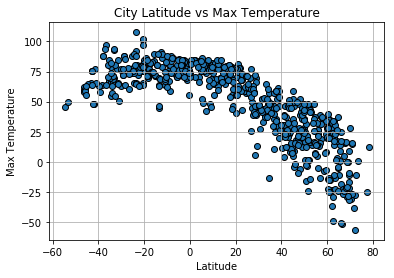

In [10]:
# Generate Title, x and y labels
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Generate the Plot
plt.scatter(lat, temp_max, marker="o", edgecolors="black")

#Create the grid
plt.grid(True)

# Save the Figure
plt.savefig("images/CityLatitudeVSMaxTemperature.png")

# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

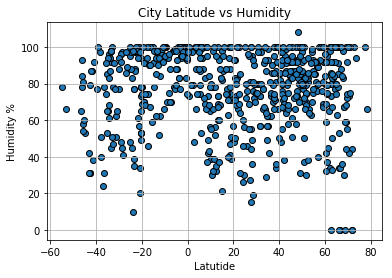

In [11]:
# Generate Title, x and y labels
plt.title("City Latitude vs Humidity")
plt.xlabel("Latutide")
plt.ylabel("Humidity %")

# Generate the Plot
plt.scatter(lat, humidity, marker="o",edgecolors="black")

#Create the grid
plt.grid(True)

# Save the Figure
plt.savefig("images/CityLatitudeVSHumidity.png")

# Show the Figure
plt.show()

#### Latitude vs. Cloudiness Plot

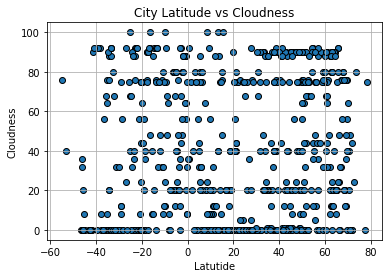

In [12]:
# Generate Title, x and y labels
plt.title("City Latitude vs Cloudness")
plt.xlabel("Latutide")
plt.ylabel("Cloudness")

#Generate the plot
plt.scatter(lat, cloudiness, marker="o", edgecolors="black")

#Create the grid
plt.grid(True)

# Save the Figure
plt.savefig("images/CityLatitudeVSCloudness.png")

# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

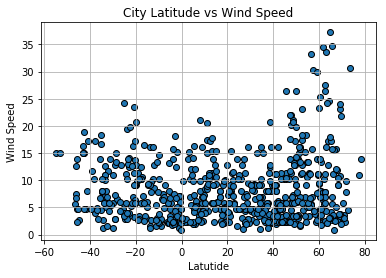

In [13]:
# Generate Title, x and y labels
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latutide")
plt.ylabel("Wind Speed")

#Generate the plot
plt.scatter(lat, wind_speed, marker="o", edgecolors="black")

#Create the grid
plt.grid(True)

# Save the Figure
plt.savefig("images/CityLatitudeVSWindSpeed.png")

# Show the Figure
plt.show()